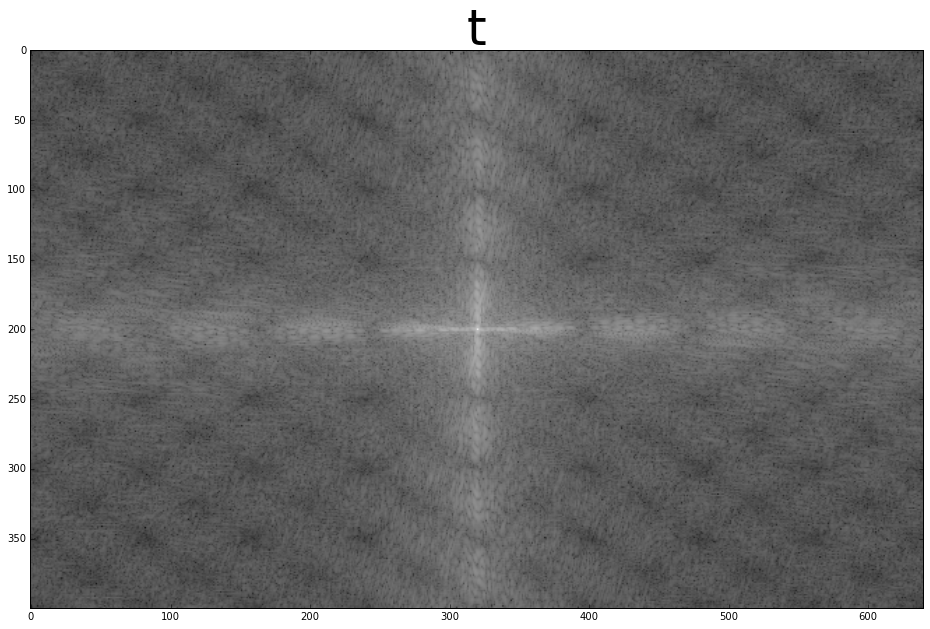

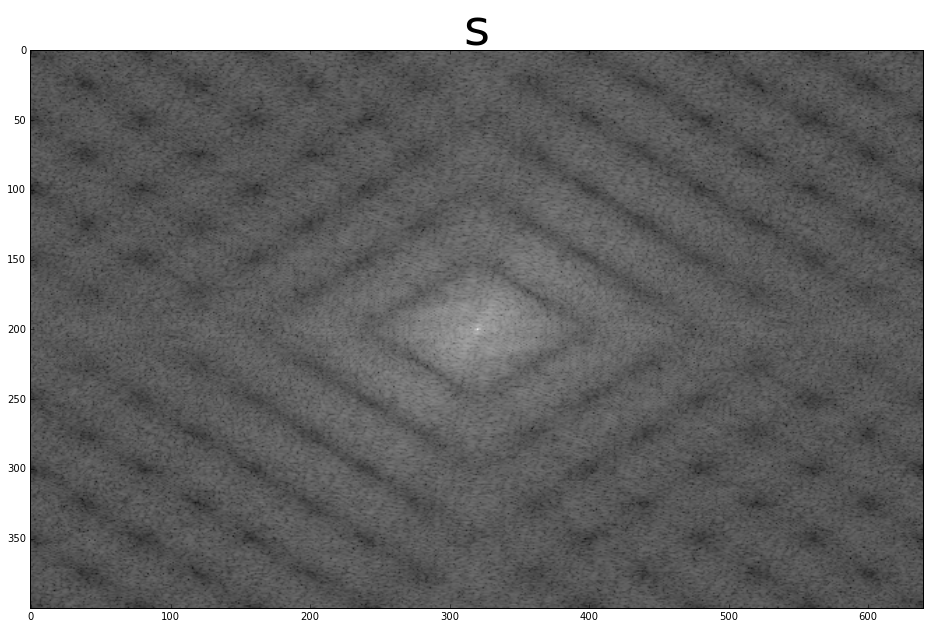

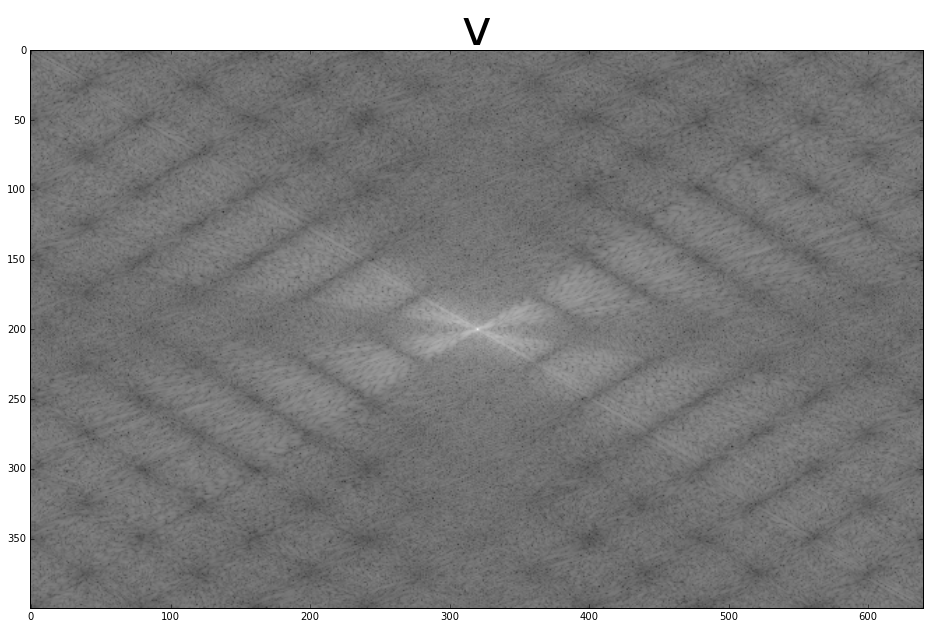

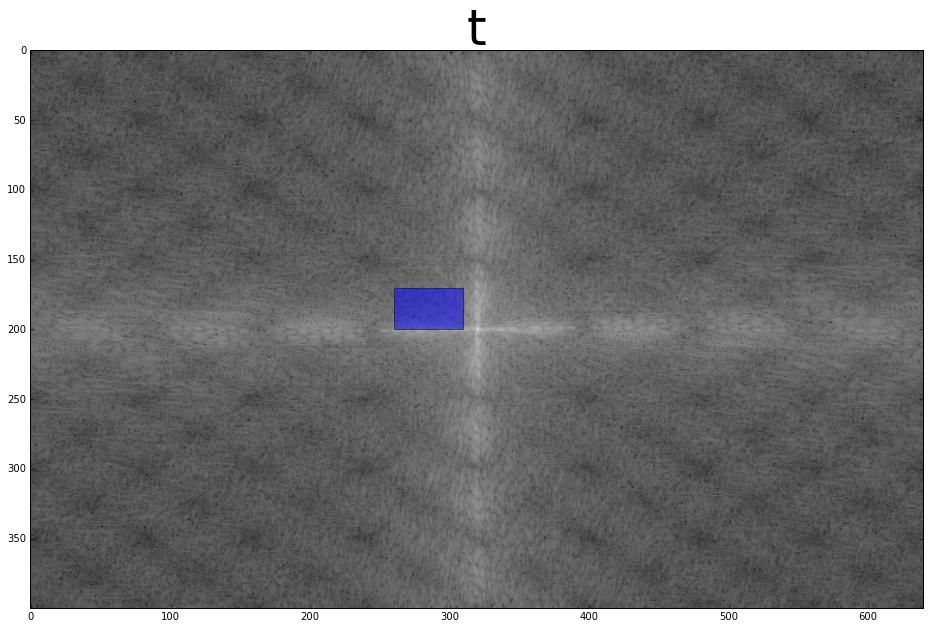

In [159]:
# for python 2 compatibility #
from __future__ import print_function
#                            #
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.pylab as pylab
import matplotlib.lines as mlines


from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

# Ts = ['./characters/T1.GIF','./characters/T2.GIF','./characters/T3.GIF',
#       './characters/T4.GIF','./characters/T5.GIF','./characters/T6.GIF',
#       './characters/T7.GIF','./characters/T8.GIF','./characters/T9.GIF',
#       './characters/T10.GIF']

# Ss = ['./characters/S1.GIF','./characters/S2.GIF','./characters/S3.GIF',
#       './characters/S4.GIF','./characters/S5.GIF','./characters/S6.GIF',
#       './characters/S7.GIF','./characters/S8.GIF','./characters/S9.GIF',
#       './characters/S10.GIF']

# Vs = ['./characters/V1.GIF','./characters/V2.GIF','./characters/V3.GIF',
#       './characters/V4.GIF','./characters/V5.GIF','./characters/V6.GIF',
#       './characters/V7.GIF','./characters/V8.GIF','./characters/V9.GIF',
#       './characters/V10.GIF']

# testTs = ['./testChars/tT1.gif','./testChars/tT2.gif','./testChars/tT3.gif',
#          './testChars/tT4.gif','./testChars/tT5.gif','./testChars/tT6.gif',
#          './testChars/tT7.gif','./testChars/tT8.gif','./testChars/tT9.gif',
#          './testChars/tT10.gif',]

# testSs = ['./testChars/tS1.gif','./testChars/tS2.gif','./testChars/tS3.gif',
#          './testChars/tS4.gif','./testChars/tS5.gif','./testChars/tS6.gif',
#          './testChars/tS7.gif','./testChars/tS8.gif','./testChars/tS9.gif',
#          './testChars/tS10.gif',]

# testVs = ['./testChars/tV1.gif','./testChars/tV2.gif','./testChars/tV3.gif',
#          './testChars/tV4.gif','./testChars/tV5.gif','./testChars/tV6.gif',
#          './testChars/tV7.gif','./testChars/tV8.gif','./testChars/tV9.gif',
#          './testChars/tV10.gif',]

def loadFiles( strPath, strFormat, start, finish ):
    aFiles = []
    for i in range(start, finish+1):
        val = str(i)
        dr = strPath + val + strFormat
        f = io.imread(dr)
        aFiles.append(f)
    return aFiles



Ss = loadFiles( 'characters/S', '.gif', 1, 10 )
Ts = loadFiles( 'characters/T', '.gif', 1, 10 )
Vs = loadFiles( 'characters/V', '.gif', 1, 10 )

testSs = loadFiles( 'testChars/tS', '.gif', 1, 20  )
testTs = loadFiles( 'testChars/tT', '.gif', 1, 20 )
testVs = loadFiles( 'testChars/tV', '.gif', 1, 20  )

def plotFT(f):
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.
    plt.show()

def getFTs(fouriers):    
    fts = []
    for i in fouriers:
        f_f = np.array(i, dtype=float)
        z = np.fft.fft2(f_f)           # do fourier transform
        q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
        fts.append(q)
    return fts 


# def getFTs(images):    
#     fts = []
#     for image in images:
#         f = io.imread(image)   # read in image
#         f_f = np.array(f, dtype=float)
#         z = np.fft.fft2(f_f)           # do fourier transform
#         q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
#         fts.append(q)
#     return fts 

def getFT(image):
    f = io.imread(image)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    return q
    
def superImposeAndPlot(fts,letter):  
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()    
    
def plotMasks(fts, letter):
    average = np.sum(fts, axis=0)
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    ax1.add_patch(mpatches.Rectangle(
    (260, 170),   # (x,y)
    50,          # width
    30,          # height
    alpha=0.5        
    )
    )
    ax1.axis("on")
    ax1.set_title(letter, {'fontsize':50})
    ax1.imshow( np.log( np.absolute(average) + 1 ), cmap='gray' ) # io.
    plt.show()
    
        
# print(Ts)
# print(Ss)
# print(Vs)
superImposeAndPlot(getFTs(Ts),"t")   
superImposeAndPlot(getFTs(Ss),"s")
superImposeAndPlot(getFTs(Vs),"v")
plotMasks(getFTs(Ts),"t");


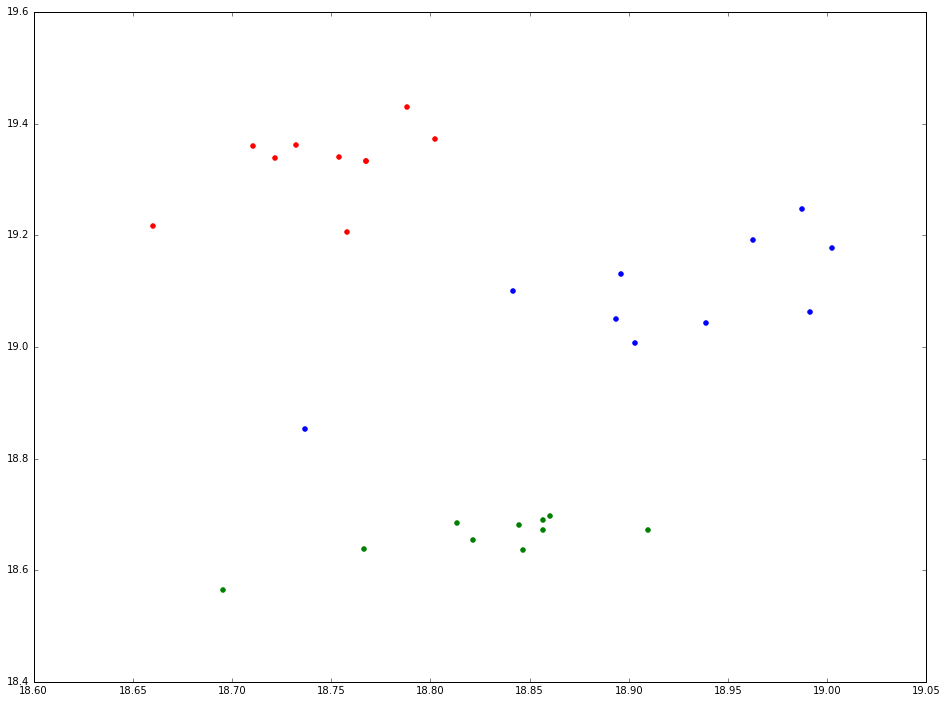

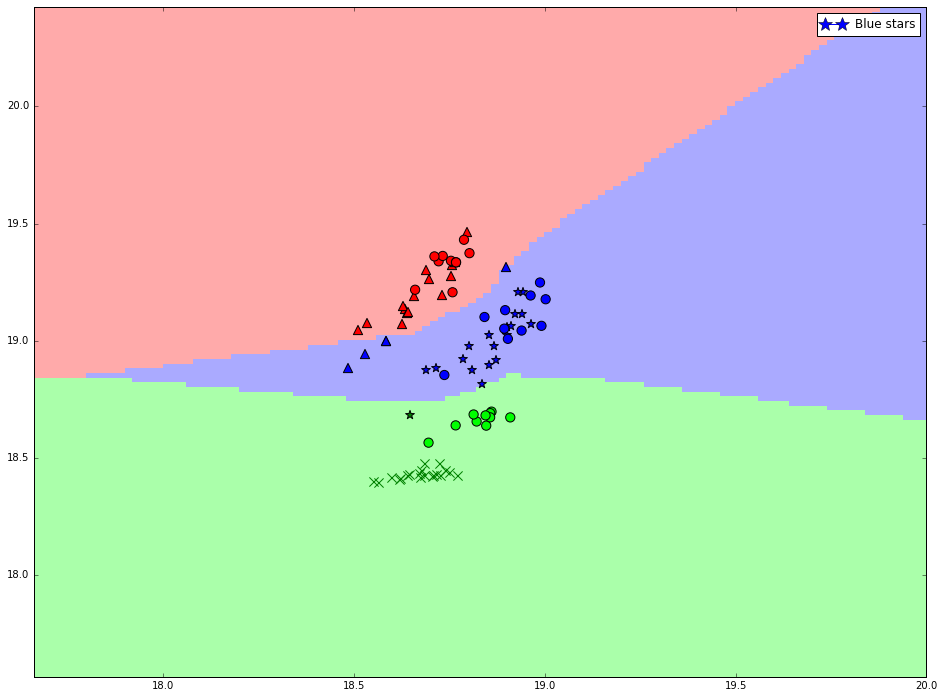

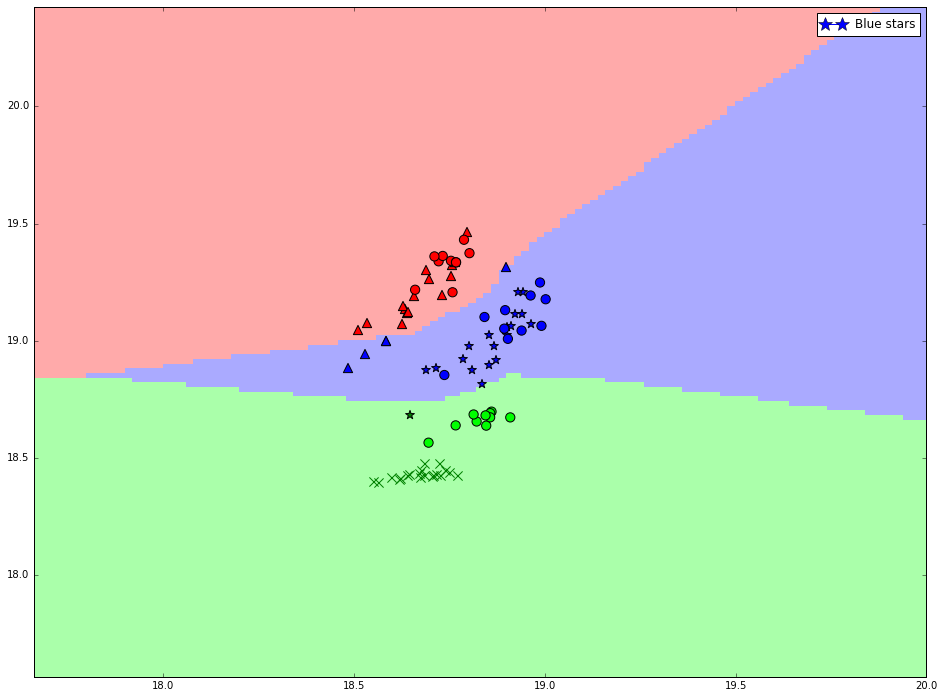

In [151]:
def box(mag):
    xmin = 260
    xmax = 310
    ymin = 160
    ymax = 190
    
    threshold = np.amax(mag)
    w, h = len(mag[0]), len(mag)    
    size = lambda x,y : True if (mag[y][x] >= threshold*0.6) and (mag[y][x] <= threshold*0.9) else False
    inRect = lambda x, y : (xmin <= x <= xmax) and (ymin <= y <= ymax)
    filterVals = lambda x, y : mag[y][x] if inRect(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def getBoxFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(box(np.absolute(ft)) + 1))
    return vals


def sector(mag):
    w, h = len(mag[0]), len(mag)
    radius     = 100
    centre     = [320,200]
    startAngle = 190
    endAngle   = 260
    
    sectorFilter = buildSectorFilter(radius,centre, mag, startAngle, endAngle)[1]
    maxMag = np.amax(mag)
    average = np.average(mag)
    thresh = average + (average *0.25) 
    thresh1 = 2*average 
    size = lambda x,y : True if (mag[y][x] >= thresh)  else False
    filterVals = lambda x, y : mag[y][x] if (sectorFilter[y][x] == 1) and size(x,y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])
    

def buildSectorFilter( radius, aCentre, array2d, startAng, endAng):
    # create boolean sector mask. startAng = 0 will read from x-axis clockwise.
    #matrix2d # converting to allow compatibility with
    shape = array2d.shape
    x,y = np.ogrid[:shape[0],:shape[1]]
    cx = aCentre[0]
    cy = aCentre[1]
    thetaStart, thetaEnd = np.deg2rad((startAng, endAng))
    # test stop angle larger than start angle
    if thetaEnd < thetaStart:
            thetaStart += 2*np.pi

    # cartesian to polar
    rPolar = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    theta = np.arctan2(x-cx,y-cy) - thetaStart
    # wrap angles between 0 and 2*pi
    theta %= (2*np.pi)
    # circle filter
    circleFilter = rPolar <= radius*radius
    # sector filter
    angFilter = theta <= (thetaEnd-thetaStart)
    sectorFilter = circleFilter*angFilter
    sector = np.array(sectorFilter)
    return (sector.flatten(), sector)

def getSectorFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(sector(np.absolute(ft)) + 1))
    return vals


#####################################################



def ring(mag):
    inner = 200
    outer = 220
    average = np.amax(mag)
    
    w, h = len(mag[0]), len(mag)
    size = lambda x,y : True if mag[y][x] <=  0.8 * average   else False
    d = lambda x, y : ((x-w//2)**2 + (y-h//2)**2)**0.5
    inRing = lambda x, y : inner <= d(x, y) and d(x, y) <= outer
    filterVals = lambda x, y : mag[y][x] if inRing(x, y)  else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])

def getRingFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(ring(np.absolute(ft))))
    return vals

#####################################################

def cross(mag):
    xmin = 315
    xmax = 325
    ymin = 190
    ymax = 210

    w, h = len(mag[0]), len(mag)
    

    inRect = lambda x, y : (xmin <= x <= xmax) or (ymin <= y <= ymax)
    filterVals = lambda x, y : mag[y][x] if inRect(x, y) else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])



def getCrossFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(cross(np.absolute(ft))))
    return vals

#####################################################
def bar(mag):
    xmin = 315
    xmax = 325
    threshold = np.amax(mag)
    w, h = len(mag[0]), len(mag)
    
    size = lambda x,y : True if (mag[y][x] >= threshold*0.6) and (mag[y][x] <= threshold*0.9) else False
    inRect = lambda x, y : (xmin <= x <= xmax)
    filterVals = lambda x, y : mag[y][x] if inRect(x, y)  else 0
    return sum([sum([filterVals(x, y) for x in range(w)]) for y in range(h)])


def getBarFeatureVals(fts):
    vals = []
    for ft in fts:
        vals.append(np.log(bar(np.absolute(ft)) + 1))
    return vals


#####################################################


def plotScatter(x1,x2,x3,y1,y2,y3):  
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    plt.scatter(x1, y1, color="r")
    plt.scatter(x2, y2, color="g")
    plt.scatter(x3, y3, color="b")
    
    fourierTestT = getFTs(testTs)
    fourierTestV = getFTs(testVs)
    fourierTestS = getFTs(testSs)
    
    t_x1 = getRingFeatureVals(fourierTestT)
    t_x2 = getRingFeatureVals(fourierTestV)
    t_x3 = getRingFeatureVals(fourierTestS)
    
    t_y1 = getBarFeatureVals(fourierTestT)
    t_y2 = getBarFeatureVals(fourierTestV)
    t_y3 = getBarFeatureVals(fourierTestS)
    
    plt.scatter(t_x1, t_y1, color="c")
    plt.scatter(t_x2, t_y2, color="y")
    plt.scatter(t_x3, t_y3, color="k")
    
    plt.show()  

    

    plt.show()
    
def plotTestDataDecisions(X, y, n_neighbours):
    
    fourierTestT = getFTs(testTs)
    fourierTestV = getFTs(testVs)
    fourierTestS = getFTs(testSs)
    
    t_x1 = getBoxFeatureVals(fourierTestT)
    t_x2 = getBoxFeatureVals(fourierTestV)
    t_x3 = getBoxFeatureVals(fourierTestS)
    
    t_y1 = getBarFeatureVals(fourierTestT)
    t_y2 = getBarFeatureVals(fourierTestV)
    t_y3 = getBarFeatureVals(fourierTestS)
    
    t = composeTestArray(t_x1, t_y1,20)
    v = composeTestArray(t_x2, t_y2,20)
    s = composeTestArray(t_x3, t_y3,20)
    
    
    h = .02  # step size in the mesh
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    

    
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#         # Plot also the training points
#         plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#         plt.xlim(xx.min(), xx.max())
#         plt.ylim(yy.min(), yy.max())
       
        # Classify test data #
        testSLabels = clf.predict(s)
        testTLabels = clf.predict(t)
        testVLabels = clf.predict(v)


        # Plot test data classification
        # * - S, ^ - T, + - V,dentoes actual label while colour denotes assigned label 
        for i in range(0, len(s)):
            if testSLabels[i] == 0:
                plt.scatter(s[i,0], s[i,1], c='r', marker='*', s=85)
            elif testSLabels[i] == 1:
                plt.scatter(s[i,0], s[i,1], c='g', marker='*', s=85)
            else:
                plt.scatter(s[i,0], s[i,1], c='b', marker='*', s=85)   

        for i in range(0, len(t)):
            if testTLabels[i] == 0:
                plt.scatter(t[i,0], t[i,1], c='r', marker='^', s=85)
            elif testTLabels[i] == 1:
                plt.scatter(t[i,0], t[i,1], c='g', marker='^', s=85)
            else:
                plt.scatter(t[i,0], t[i,1], c='b', marker='^', s=85)  

        for i in range(0, len(v)):
            if testVLabels[i] == 0:
                plt.scatter(v[i,0], v[i,1], c='r', marker='x', s=85)
            elif testVLabels[i] == 1:
                plt.scatter(v[i,0], v[i,1], c='g', marker='x', s=85)
            else:
                plt.scatter(v[i,0], v[i,1], c='b', marker='x', s=85)  

    
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=85)

        # Plot Legend 
        blue_line = mlines.Line2D([], [], color='blue', marker='*',
                              markersize=15, label='Blue stars')
        blue_line = mlines.Line2D([], [], color='blue', marker='*',
                              markersize=15, label='Blue stars')

        plt.legend(handles=[blue_line])

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    
    plt.show()

    
    
    
def composeArray(x1,x2,x3,y1,y2,y3):
    coords = []
    for i in range (0, 10):
        coords.append([x1.pop(), y1.pop()])

    for i  in range(0, 10):
        coords.append([x2.pop(), y2.pop()])

    for i  in range(0, 10):
        coords.append([x3.pop(), y3.pop()])
    return np.asarray(coords)


def composeTestArray(x1,y1,n):
    coords = []
    for i in range (0, n):
        coords.append([x1.pop(), y1.pop()])
    return np.asarray(coords)    
        
    

def circleCluster(fourierT, fourierV, fourierS):
    x1 = getBoxFeatureVals(fourierT)
    x2 = getBoxFeatureVals(fourierV)
    x3 = getBoxFeatureVals(fourierS)

    y1 = getBarFeatureVals(fourierT)
    y2 = getBarFeatureVals(fourierV)
    y3 = getBarFeatureVals(fourierS)
    
    
#     fourierTestT = getFTs(testTs)
#     fourierTestV = getFTs(testVs)
#     fourierTestS = getFTs(testSs)
    
    
#     t_x1 = getSectorFeatureVals(fourierTestT)
#     t_x2 = getSectorFeatureVals(fourierTestV)
#     t_x3 = getSectorFeatureVals(fourierTestS)
    
#     t_y1 = getBarFeatureVals(fourierTestT)
#     t_y2 = getBarFeatureVals(fourierTestV)
#     t_y3 = getBarFeatureVals(fourierTestS)
  
    
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    plt.scatter(x1, y1, color="r")
    plt.scatter(x2, y2, color="g")
    plt.scatter(x3, y3, color="b")
    
#     plt.scatter(t_x1,t_y1, color="c")
#     plt.scatter(t_x2,t_y2, color="y")
#     plt.scatter(t_x3,t_y3, color="k")

    plt.show()
    
    X = composeArray(x1,x2,x3,y1,y2,y3)
    y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])
    plotTestDataDecisions(X,y,1)





circleCluster(fourierT, fourierV, fourierS)





In [150]:



def plotDecision(X, y, n_neighbors):
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    fourierTest = getFTs(testTs)
    t1 = getRingFeatureVals(fourierTest)
    t2 = getBarFeatureVals(fourierTest)

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))


def sectorCluster(fourierT, fourierV, fourierS):
    
    fourierTestT = getFTs(testTs)
    fourierTestV = getFTs(testVs)
    fourierTestS = getFTs(testSs)
    
    
    
    x1 = getSectorFeatureVals(fourierT)
    x2 = getSectorFeatureVals(fourierV)
    x3 = getSectorFeatureVals(fourierS)

    y1 = getBarFeatureVals(fourierT)
    y2 = getBarFeatureVals(fourierV)
    y3 = getBarFeatureVals(fourierS)
    
    fig1 = plt.figure()
    ax1  = fig1.add_subplot( 111 )
    
    plt.scatter(x1, y1, color="r")
    plt.scatter(x2, y2, color="g")
    plt.scatter(x3, y3, color="b")

   
    
    plt.show()
    
    X = composeArray(x1,x2,x3,y1,y2,y3)
    y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])
    plotTestDataDecisions(X,y,1)
 









